# Intro to scipy.stats

scipy.stats contains a bunch of useful objects and functions for things such as generating and fitting probability distributions (pdf, cdf, sf (ccdf), etc.), generating random variables from paramterized distributions, running standard statistical analyses to test model fits, etc. 

## Generating and displaying probability distributions
In scipy.stats, we can create and interact with probability distributions as objects. Let's start by generating a normal distribution and displaying it in several ways. 

In [1]:
%pylab inline

import scipy.stats as stats
# import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Normal distribution

In [2]:
# generate a normal distribution object and assign it to a variable
norm = stats.norm()

In [3]:
norm

In [4]:
norm.mean(), norm.std(), norm.moment(n=4)

(0.0, 1.0, 3.0)

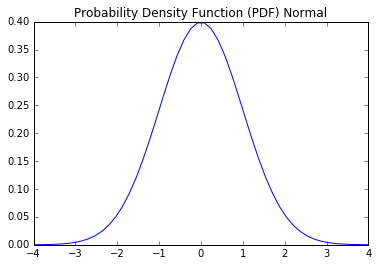

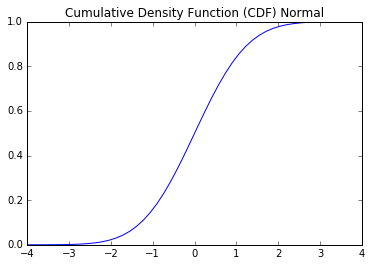

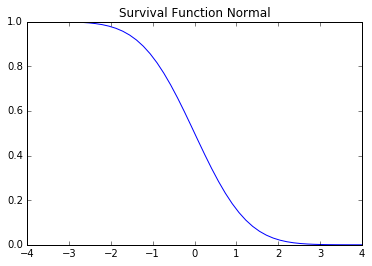

In [5]:
x = np.linspace(-4,4)
plt.plot(x, norm.pdf(x))
plt.title('Probability Density Function (PDF) Normal')

plt.figure()
plt.plot(x, norm.cdf(x))
plt.title('Cumulative Density Function (CDF) Normal')

plt.figure()
plt.plot(x, norm.sf(x))
plt.title('Survival Function Normal')


### Fat-tailed distribution

Let's have a look at a fat-tailed distribution now. A pareto distribution is defined as 

\begin{equation}
f(x) = b x^{-(b+1)}, \ \  b>0,  \ \  x \geq 1 
\end{equation}

In this case, we will need to specify the parameter b when we generate the distribution object. When we generate a distribution and pass it parameters explicitly we create a "frozen" distribution object. We could have passed parameters to the normal distribution (i.e. mean and standard deviation), but instead it defaulted to their degenerate values (i.e. mean 0 std 1). 

Let's generate three forzen pareto distribution objects with different $b$ parameters. 

In [6]:
pareto_1 = stats.pareto(b=1.0)
pareto_2 = stats.pareto(b=2.0)
pareto_3 = stats.pareto(b=3.0)

print pareto_1.mean(), pareto_1.std()
print pareto_2.mean(), pareto_2.std()
print pareto_3.mean(), pareto_3.std()


inf inf
2.0 inf
1.5 0.866025403784


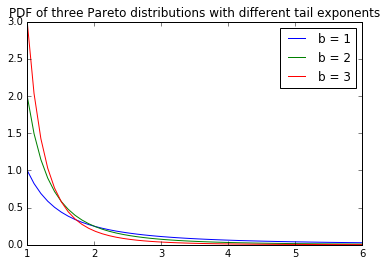

In [7]:
x = np.linspace(1,6)

plt.plot(x, pareto_1.pdf(x), label='b = 1')
plt.plot(x, pareto_2.pdf(x), label='b = 2')
plt.plot(x, pareto_3.pdf(x), label='b = 3')
plt.title('PDF of three Pareto distributions with different tail exponents')
plt.legend()

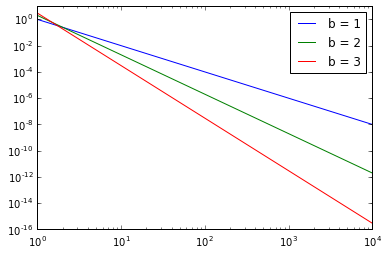

In [8]:
x = np.linspace(1,10000,1000000)

plt.loglog(x, pareto_1.pdf(x), label='b = 1')
plt.loglog(x, pareto_2.pdf(x), label='b = 2')
plt.loglog(x, pareto_3.pdf(x), label='b = 3')
plt.legend()

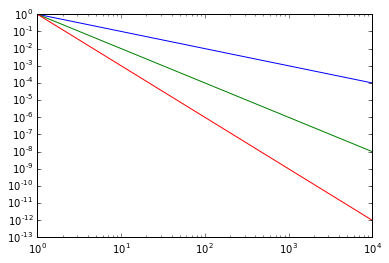

In [9]:
plt.loglog(x, pareto_1.sf(x))
plt.loglog(x, pareto_2.sf(x))
plt.loglog(x, pareto_3.sf(x))

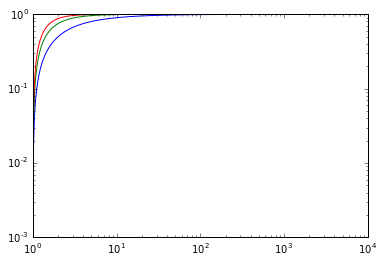

In [10]:
plt.loglog(x, pareto_1.cdf(x))
plt.loglog(x, pareto_2.cdf(x))
plt.loglog(x, pareto_3.cdf(x))

## Generating random variables from a distribution

In [11]:
norm.rvs()

0.3752795784934376

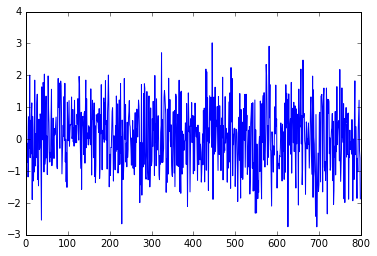

In [12]:
plt.plot(norm.rvs(size=800))

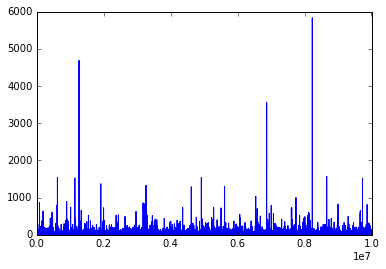

In [13]:
plt.plot(pareto_2.rvs(size=10000000))

## Generating histograms from data

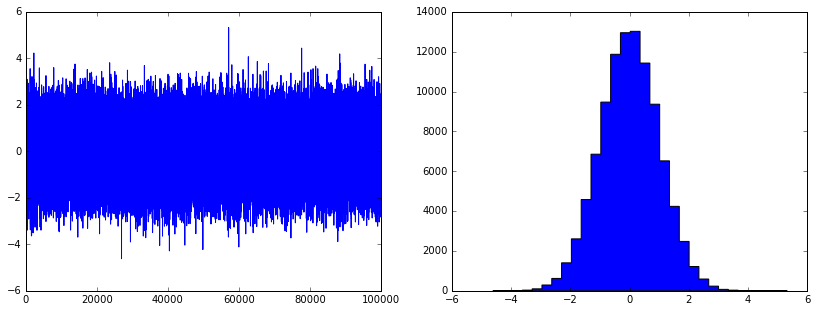

In [14]:
#generate some random values from our frozen normal distribution 
norm_series = norm.rvs(100000)

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(norm_series)
ax[1].hist(norm_series, histtype='stepfilled', bins=30)
plt.show()

### Histograms for fat tails 

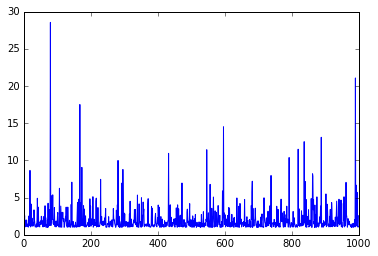

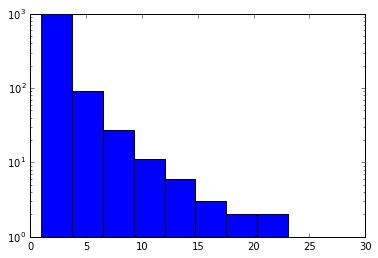

In [15]:
pareto_series = pareto_2.rvs(size=1000)
plt.plot(pareto_series)

plt.figure()
plt.hist(pareto_series, cumulative=-1, normed=False, log=True)
# plt.gca().set_xscale('log')
plt.show()

Because of the scaling in power laws, simple binning is awkward, and doesn't quite give us what we want. It is often much simpler to deal with the empirical survival function (which is also a power law!). It is straightforward to convert our data to an empirical surival function by sorting it. 

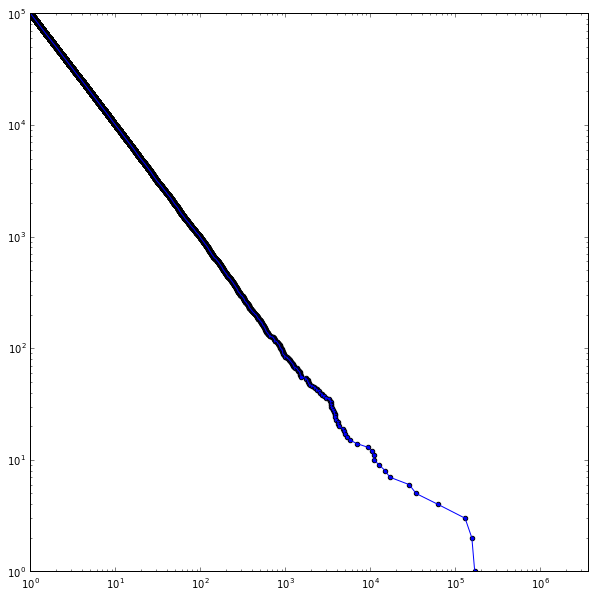

In [16]:
Y = pareto_1.rvs(size=100000)
Y.sort()
x = np.arange(len(Y)-1, -1, step=-1)

fig, ax = plt.subplots(1, figsize=(10,10))
ax.plot(Y,x)
ax.scatter(Y,x)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((1,Y.max()))
ax.set_ylim(1, (len(Y)))
plt.show()

## Fitting Data

In addition to generating a "frozen" dsitribution, we can find the parameters that best fit a model to data using the `fit()` function of a given distribution. The `fit()` function uses maximum-likelihood estimation (MLE). It is often convenient to generate a frozen distribution with the fitted parameters.

In [17]:
# generate some data from a normal distribution with mean 0 and variance 1
norm_data = stats.norm.rvs(size=1000)

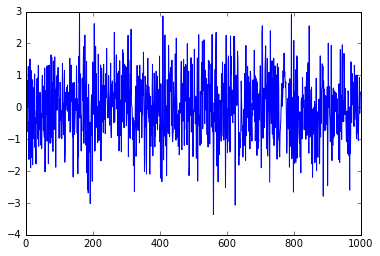

In [18]:
plt.plot(norm_data)

In [19]:
norm_parameter_fit = stats.norm.fit(norm_data)

In [20]:
norm_parameter_fit

(0.00067198010390401742, 1.020211203628028)

In [21]:
#generate a frozen distribution with fitted location and scale parameters 
fitted_norm = stats.norm(loc=norm_parameter_fit[0], scale=norm_parameter_fit[1])

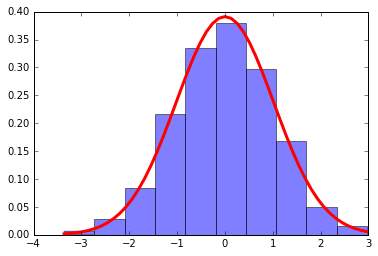

In [22]:
x = np.linspace(norm_data.min(), norm_data.max())
plt.hist(norm_data, normed=True, alpha=0.5)
plt.plot(x, fitted_norm.pdf(x), 'r', lw=3)

(-0.2965361733625238, 2.7687607322151493)

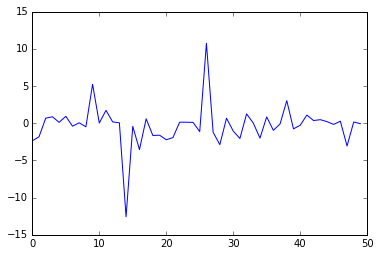

In [58]:
t_data = stats.t.rvs(df=2,size=50)
plt.plot(t_data)

norm_parameter_fit_2 = stats.norm.fit(t_data)
norm_parameter_fit_2

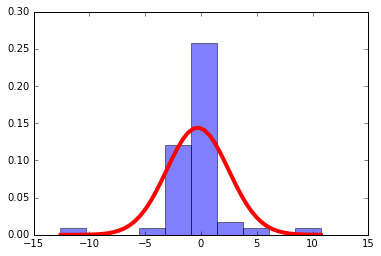

In [59]:
fitted_norm_2 = stats.norm(loc=norm_parameter_fit_2[0], scale=norm_parameter_fit_2[1])

x = np.linspace(t_data.min(), t_data.max())

plt.hist(t_data, normed=True, alpha=0.5)
plt.plot(x, fitted_norm_2.pdf(x), 'r', lw=4)